In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [103]:
data=pd.read_csv('2018_worldcup_v3.xls')

In [104]:
data.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Referee,Assistant 1,Assistant 2,MatchID,Attendance
0,2018,14 Jun 2018 - 18:00,Group A,"Luzhniki Stadium,",Moscow,Russia,5,0,Saudi Arabia,PITANA Nestor (ARG),MAIDANA Hernan (ARG),BELATTI Juan Pablo (ARG),300331503,78011
1,2018,15 Jun 2018 - 17:00,Group A,"Ekaterinburg Arena,",Ekaterinburg,Egypt,0,1,Uruguay,KUIPERS Bjorn (NED),VAN ROEKEL Sander (NED),ZEINSTRA Erwin (NED),300353632,27015
2,2018,15 Jun 2018 - 18:00,Group B,"Saint Petersburg Stadium,",St. Petersburg,Morocco,0,1,IR Iran,CAKIR Cuneyt (TUR),DURAN Bahattin (TUR),ONGUN Tarik (TUR),300331526,62548
3,2018,15 Jun 2018 - 21:00,Group B,"Fisht Stadium,",Sochi,Portugal,3,3,Spain,ROCCHI Gianluca (ITA),DI LIBERATORE Elenito (ITA),TONOLINI Mauro (ITA),300331524,43866
4,2018,16 Jun 2018 - 13:00,Group C,"Kazan Arena,",Kazan,France,2,1,Australia,CUNHA Andres (URU),TARAN Nicolas (URU),ESPINOSA Mauricio (URU),300331533,41279


In [105]:
data.tail()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Referee,Assistant 1,Assistant 2,MatchID,Attendance
59,2018,07 Jul 2018 - 21:00,Quarter-finals,"Fisht Stadium,",Sochi,Russia,2,2,Croatia,RICCI Sandro (BRA),DE CARVALHO Emerson (BRA),VAN GASSE Marcelo (BRA),300331504,44287
60,2018,10 Jul 2018 - 21:00,Semi-finals,"Saint Petersburg Stadium,",St. Petersburg,France,1,0,Belgium,CUNHA Andres (URU),TARAN Nicolas (URU),ESPINOSA Mauricio (URU),300331531,64286
61,2018,11 Jul 2018 - 21:00,Semi-finals,"Luzhniki Stadium,",Moscow,Croatia,2,1,England,CAKIR Cuneyt (TUR),DURAN Bahattin (TUR),ONGUN Tarik (TUR),300331522,78011
62,2018,14 Jul 2018 - 17:00,Play-off for third place,"Saint Petersburg Stadium,",St. Petersburg,Belgium,2,0,England,FAGHANI Alireza (IRN),SOKHANDAN Reza (IRN),MANSOURI Mohammadreza (IRN),300331536,64406
63,2018,15 Jul 2018 - 18:00,Final,"Luzhniki Stadium,",Moscow,France,4,2,Croatia,PITANA Nestor (ARG),MAIDANA Hernan (ARG),BELATTI Juan Pablo (ARG),300331552,78011


In [106]:
data.shape

(64, 14)

In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Year             64 non-null     int64 
 1   Datetime         64 non-null     object
 2   Stage            64 non-null     object
 3   Stadium          64 non-null     object
 4   City             64 non-null     object
 5   Home Team Name   64 non-null     object
 6   Home Team Goals  64 non-null     int64 
 7   Away Team Goals  64 non-null     int64 
 8   Away Team Name   64 non-null     object
 9   Referee          64 non-null     object
 10  Assistant 1      64 non-null     object
 11  Assistant 2      64 non-null     object
 12  MatchID          64 non-null     int64 
 13  Attendance       64 non-null     int64 
dtypes: int64(5), object(9)
memory usage: 7.1+ KB


In [108]:
data.isnull().sum()

Year               0
Datetime           0
Stage              0
Stadium            0
City               0
Home Team Name     0
Home Team Goals    0
Away Team Goals    0
Away Team Name     0
Referee            0
Assistant 1        0
Assistant 2        0
MatchID            0
Attendance         0
dtype: int64

## Number of Matches Per Stadium

In [109]:
x=data.Stadium.value_counts()

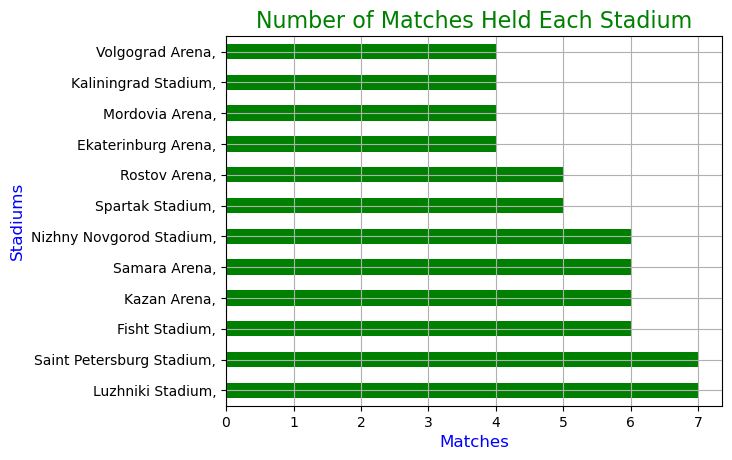

In [110]:
plt.title('Number of Matches Held Each Stadium',fontsize=16,color='Green')
x.plot(kind='barh',color='green')
plt.xlabel('Matches',fontsize=12,color='blue')
plt.ylabel('Stadiums',fontsize=12,color='blue')
plt.grid()

## Number of Goals Each Stadium

In [111]:
data['Total Goals']=data['Home Team Goals']+data['Away Team Goals']

In [112]:
data['Stadium']

0             Luzhniki Stadium,
1           Ekaterinburg Arena,
2     Saint Petersburg Stadium,
3                Fisht Stadium,
4                  Kazan Arena,
                ...            
59               Fisht Stadium,
60    Saint Petersburg Stadium,
61            Luzhniki Stadium,
62    Saint Petersburg Stadium,
63            Luzhniki Stadium,
Name: Stadium, Length: 64, dtype: object

In [113]:
x=data.groupby('Stadium')['Total Goals'].sum()

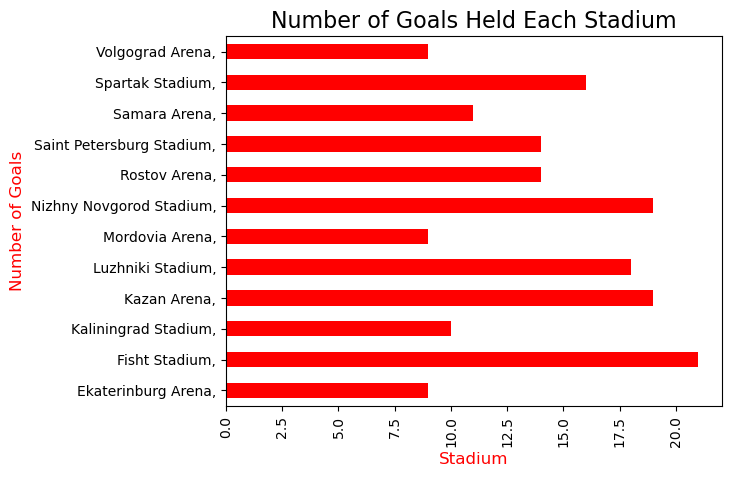

In [114]:
x.plot(kind='barh',color='red')
plt.title('Number of Goals Held Each Stadium',fontsize=16)
plt.xlabel('Stadium',fontsize=12,color='red')
plt.ylabel('Number of Goals',fontsize=12,color='red')
plt.xticks(rotation=90)
plt.show()

## Number of Matches Each City of Russia

In [115]:
x=data.City.value_counts()

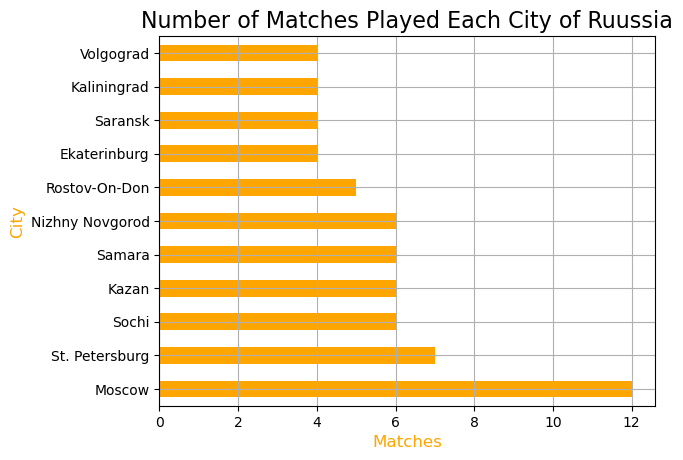

In [116]:
plt.title('Number of Matches Played Each City of Ruussia',fontsize=16)
x.plot(kind='barh',color='orange')
plt.xlabel('Matches',fontsize=12,color='orange')
plt.ylabel('City',fontsize=12,color='orange')
plt.grid()

## Number of Audience Join Match Each  Stadium

In [135]:
data.groupby('Stadium')['Attendance'].sum()

Stadium
Ekaterinburg Arena,          125437
Fisht Stadium,               264057
Kaliningrad Stadium,         132249
Kazan Arena,                 254451
Luzhniki Stadium,            546077
Mordovia Arena,              160197
Nizhny Novgorod Stadium,     256427
Rostov Arena,                214197
Saint Petersburg Stadium,    448686
Samara Arena,                248060
Spartak Stadium,             220950
Volgograd Arena,             160980
Name: Attendance, dtype: int64

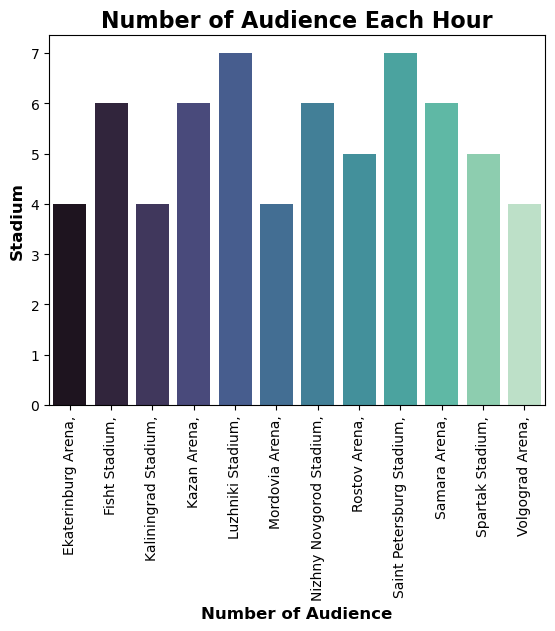

In [138]:
plt.title('Number of Audience Each Hour',fontsize=16,fontweight='bold')
sns.countplot(x='Stadium',data=data,palette='mako',order=data.groupby('Stadium')['Attendance'].sum().index)
plt.xlabel('Number of Audience',fontsize=12,fontweight='bold')
plt.ylabel('Stadium',fontsize=12,fontweight='bold')
plt.xticks(rotation=90)
plt.show()

## Number of Matches Held Each Hours

In [117]:
data['Hours']=data['Datetime'].apply(lambda x:x.split('-')[1])
data['Datetime']=data['Datetime'].apply(lambda x:x.split('-')[0])

In [98]:
data['Hours'].sort_index().value_counts()

 21:00    23
 18:00    13
 17:00    11
 15:00     6
 20:00     5
 16:00     3
 19:00     2
 13:00     1
Name: Hours, dtype: int64

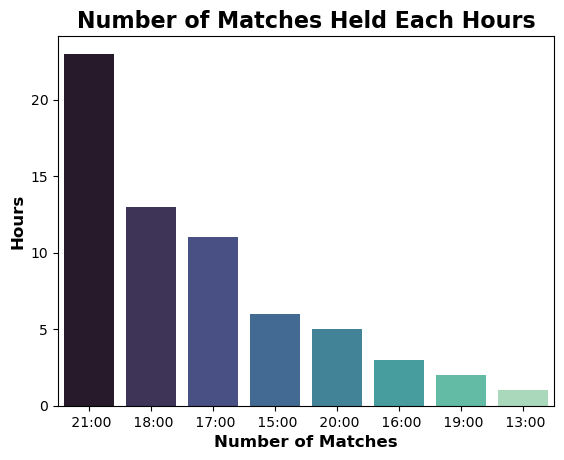

In [124]:
plt.title('Number of Matches Held Each Hours',fontsize=16,fontweight='bold')
sns.countplot(x='Hours',data=data,palette='mako',order=data['Hours'].value_counts().index)
plt.xlabel('Number of Matches',fontsize=12,fontweight='bold')
plt.ylabel('Hours',fontsize=12,fontweight='bold')
plt.show()

## Number of Goals Held Each Hour

In [85]:
x=data.groupby('Hours')['Total Goals'].sum()

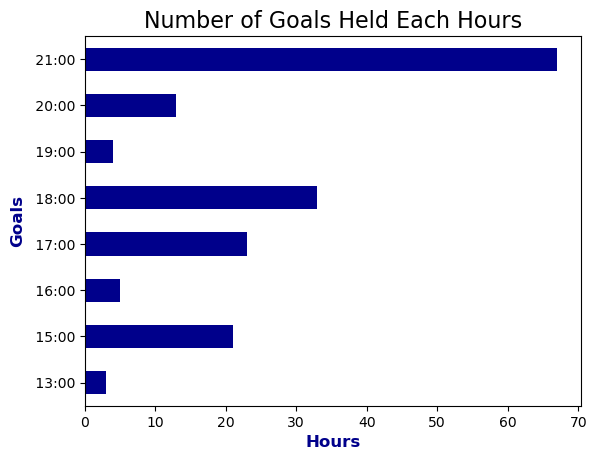

In [96]:
x.plot(kind='barh',color='darkBlue')
plt.title('Number of Goals Held Each Hours',fontsize=16)
plt.xlabel('Hours',fontsize=12,color='darkBlue',fontweight='bold')
plt.ylabel('Goals',fontsize=12,color='darkBlue',fontweight='bold')
plt.show()

## Number of Audience Join the Match Each Hour

In [127]:
data.groupby('Hours')['Attendance'].sum()

Hours
 13:00      41279
 15:00     313130
 16:00     126349
 17:00     562597
 18:00     676983
 19:00      73563
 20:00     166474
 21:00    1071393
Name: Attendance, dtype: int64

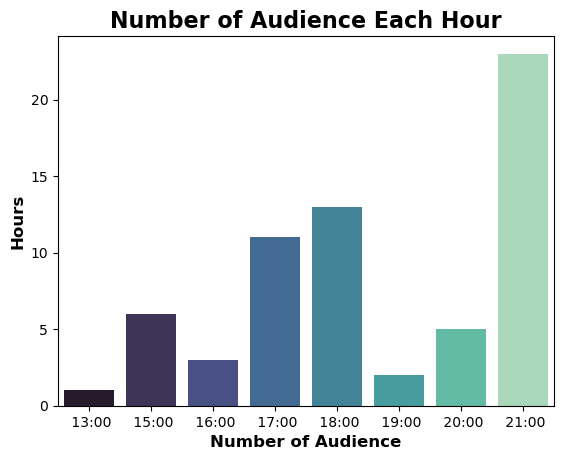

In [133]:
plt.title('Number of Audience Each Hour',fontsize=16,fontweight='bold')
sns.countplot(x='Hours',data=data,palette='mako',order=data.groupby('Hours')['Attendance'].sum().index)
plt.xlabel('Number of Audience',fontsize=12,fontweight='bold')
plt.ylabel('Hours',fontsize=12,fontweight='bold')
plt.show()

## Number of Matches held Each Date

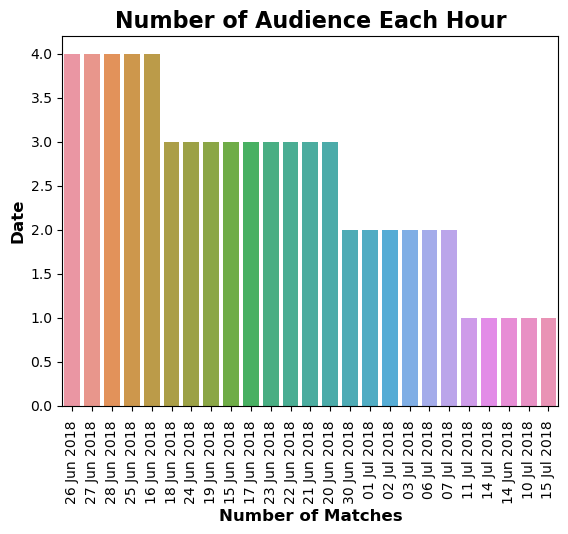

In [145]:
plt.title('Number of Audience Each Hour',fontsize=16,fontweight='bold')
sns.countplot(x='Datetime',data=data,order=data['Datetime'].value_counts().index)
plt.xlabel('Number of Matches',fontsize=12,fontweight='bold')
plt.ylabel('Date',fontsize=12,fontweight='bold')
plt.xticks(rotation=90)
plt.show()

## Number of Goals Held Each Day

In [155]:
x=data.groupby('Datetime')['Total Goals'].sum()
x

Datetime
01 Jul 2018      4
02 Jul 2018      7
03 Jul 2018      3
06 Jul 2018      5
07 Jul 2018      6
10 Jul 2018      1
11 Jul 2018      3
14 Jul 2018      2
14 Jun 2018      5
15 Jul 2018      6
15 Jun 2018      8
16 Jun 2018      8
17 Jun 2018      4
18 Jun 2018      7
19 Jun 2018     10
20 Jun 2018      3
21 Jun 2018      6
22 Jun 2018      7
23 Jun 2018     13
24 Jun 2018     14
25 Jun 2018     12
26 Jun 2018      8
27 Jun 2018     11
28 Jun 2018      6
30 Jun 2018     10
Name: Total Goals, dtype: int64

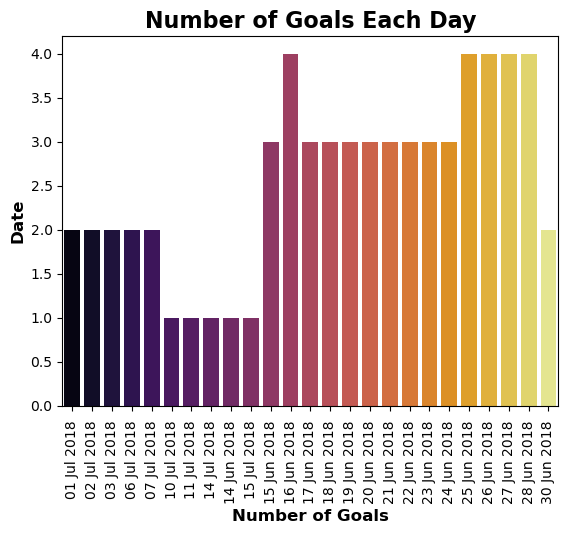

In [157]:
plt.title('Number of Goals Each Day',fontsize=16,fontweight='bold')
sns.countplot(x='Datetime',data=data,palette='inferno',order=data.groupby('Datetime')['Total Goals'].sum().index)
plt.xlabel('Number of Goals',fontsize=12,fontweight='bold')
plt.ylabel('Date',fontsize=12,fontweight='bold')
plt.xticks(rotation=90)
plt.show()

## Number of Audience Each Day

In [161]:
x=data.groupby('Datetime')['Attendance'].sum()
x

Datetime
01 Jul 2018     118862
02 Jul 2018      83436
03 Jul 2018     108232
06 Jul 2018      86192
07 Jul 2018      84278
10 Jul 2018      64286
11 Jul 2018      78011
14 Jul 2018      64406
14 Jun 2018      78011
15 Jul 2018      78011
15 Jun 2018     133429
16 Jun 2018     157107
17 Jun 2018     162552
18 Jun 2018     126621
19 Jun 2018     149500
20 Jun 2018     163407
21 Jun 2018     116835
22 Jun 2018     138539
23 Jun 2018     131949
24 Jun 2018     118764
25 Jun 2018     154451
26 Jun 2018     230024
27 Jun 2018     162405
28 Jun 2018     155300
30 Jun 2018      87160
Name: Attendance, dtype: int64

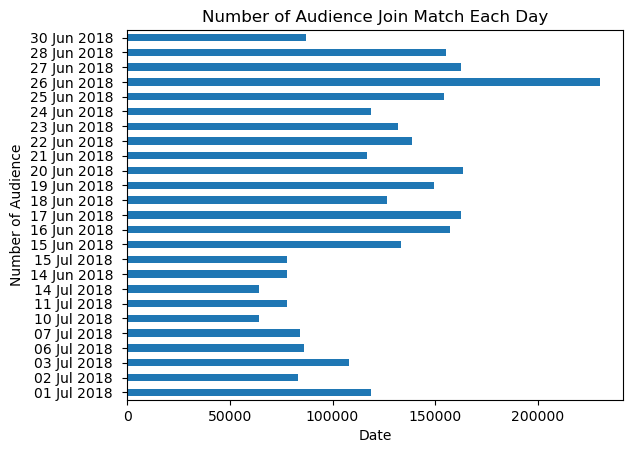

In [162]:
x.plot(kind='barh')
plt.title('Number of Audience Join Match Each Day')
plt.xlabel('Date')
plt.ylabel('Number of Audience')
plt.show()

## Total Goals by Each Away Team

In [165]:
x=data.groupby('Away Team Name')['Away Team Goals'].sum()
x

Away Team Name
Argentina         5
Australia         2
Belgium           3
Brazil            2
Colombia          4
Costa Rica        2
Croatia           9
Denmark           2
Egypt             2
England           6
France            2
Germany           0
IR Iran           1
Iceland           1
Japan             4
Korea Republic    0
Mexico            3
Morocco           2
Nigeria           0
Panama            1
Peru              2
Poland            1
Portugal          2
Russia            1
Saudi Arabia      0
Senegal           4
Serbia            1
Spain             4
Sweden            4
Switzerland       3
Tunisia           4
Uruguay           1
Name: Away Team Goals, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

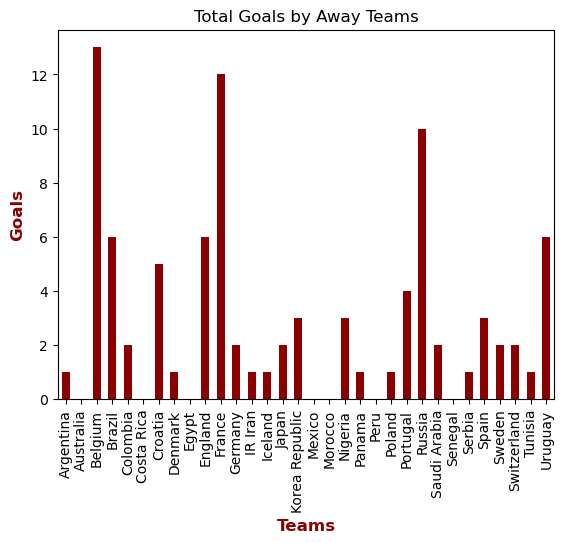

In [186]:
plt.title('Total Goals by Away Teams')
x.plot(kind='bar',color='darkred')
plt.xlabel('Teams',fontsize=12,fontweight='bold',color='darkred')
plt.ylabel('Goals',fontsize=12,fontweight='bold',color='darkred')
plt.show

## Number of Matches Away Team

In [187]:
x=data['Away Team Name'].value_counts()
x

England           5
Croatia           4
Belgium           3
Mexico            3
Switzerland       3
Morocco           2
Argentina         2
France            2
Portugal          2
Russia            2
Colombia          2
Sweden            2
Tunisia           2
Costa Rica        2
Peru              2
Saudi Arabia      2
Senegal           2
Japan             2
Panama            2
Denmark           2
Iceland           2
Australia         2
Spain             2
Egypt             2
Uruguay           1
Korea Republic    1
Serbia            1
Nigeria           1
IR Iran           1
Germany           1
Brazil            1
Poland            1
Name: Away Team Name, dtype: int64

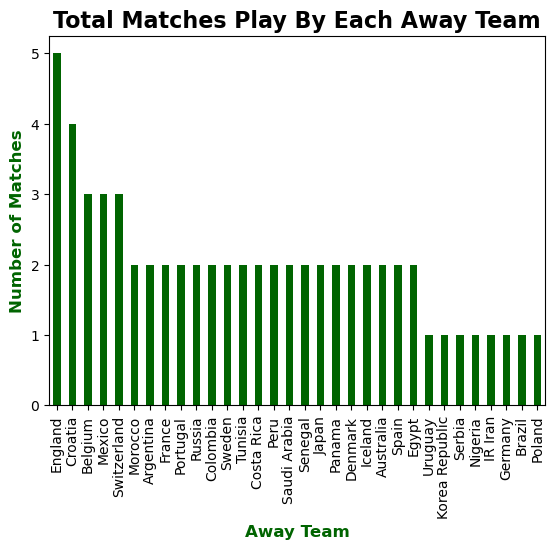

In [181]:
x.plot(kind='bar',color='darkgreen')
plt.title('Total Matches Play By Each Away Team',fontsize=16,fontweight='bold')
plt.xlabel('Away Team',color='darkgreen' ,fontsize=12,fontweight='bold')
plt.ylabel('Number of Matches',color='darkgreen' ,fontsize=12,fontweight='bold')
plt.show()

## Number of Goals by Each Home Team

In [183]:
x=data.groupby('Home Team Name')['Home Team Goals'].sum()
x

Home Team Name
Argentina          1
Australia          0
Belgium           13
Brazil             6
Colombia           2
Costa Rica         0
Croatia            5
Denmark            1
Egypt              0
England            6
France            12
Germany            2
IR Iran            1
Iceland            1
Japan              2
Korea Republic     3
Mexico             0
Morocco            0
Nigeria            3
Panama             1
Peru               0
Poland             1
Portugal           4
Russia            10
Saudi Arabia       2
Senegal            0
Serbia             1
Spain              3
Sweden             2
Switzerland        2
Tunisia            1
Uruguay            6
Name: Home Team Goals, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

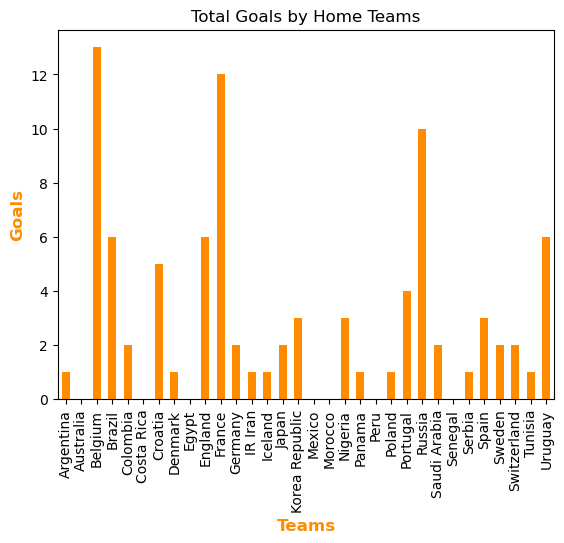

In [185]:
plt.title('Total Goals by Home Teams')
x.plot(kind='bar',color='darkorange')
plt.xlabel('Teams',fontsize=12,fontweight='bold',color='darkorange')
plt.ylabel('Goals',fontsize=12,fontweight='bold',color='darkorange')
plt.show

## Number of Audience by Each Home Team

In [199]:
x=data.groupby('Away Team Name')['Attendance'].sum()
x

Away Team Name
Argentina         107341
Australia          82006
Belgium           141132
Brazil             44190
Colombia           84843
Costa Rica        107787
Croatia           209089
Denmark            81353
Egypt             101291
England           267662
France            121330
Germany            41835
IR Iran            62548
Iceland            85094
Japan              82308
Korea Republic     42300
Mexico            163453
Morocco           111984
Nigeria            31136
Panama             86576
Peru               76862
Poland             42189
Portugal           85972
Russia            119981
Saudi Arabia      120689
Senegal            76762
Serbia             41432
Spain              86584
Sweden             77348
Switzerland       140318
Tunisia            81358
Uruguay            27015
Name: Attendance, dtype: int64

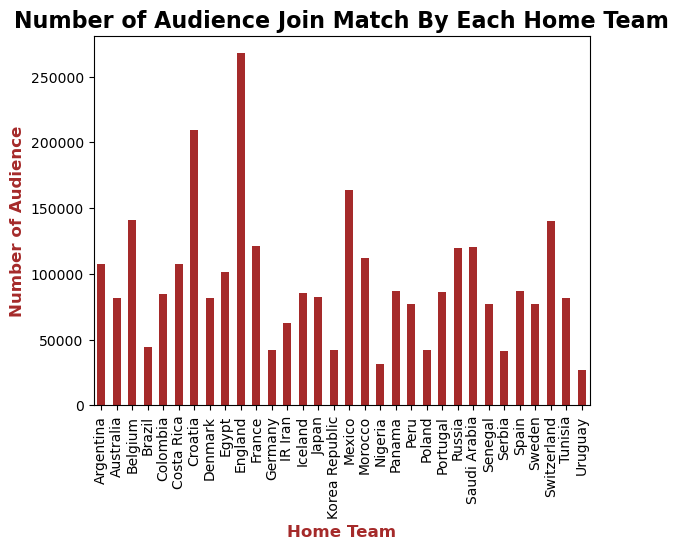

In [200]:
x.plot(kind='bar',color='brown')
plt.title('Number of Audience Join Match By Each Home Team',fontsize=16,fontweight='bold')
plt.xlabel('Home Team',color='brown' ,fontsize=12,fontweight='bold')
plt.ylabel('Number of Audience',color='brown' ,fontsize=12,fontweight='bold')
plt.show()

## Number of Matches by Each Home Team

In [189]:
x=data['Home Team Name'].value_counts()
x

France            5
Uruguay           4
Belgium           4
Brazil            4
Croatia           3
Sweden            3
Russia            3
Nigeria           2
Serbia            2
Germany           2
Argentina         2
Portugal          2
Japan             2
England           2
Colombia          2
Poland            2
Spain             2
IR Iran           2
Denmark           2
Korea Republic    2
Mexico            1
Iceland           1
Switzerland       1
Senegal           1
Australia         1
Peru              1
Saudi Arabia      1
Costa Rica        1
Egypt             1
Tunisia           1
Morocco           1
Panama            1
Name: Home Team Name, dtype: int64

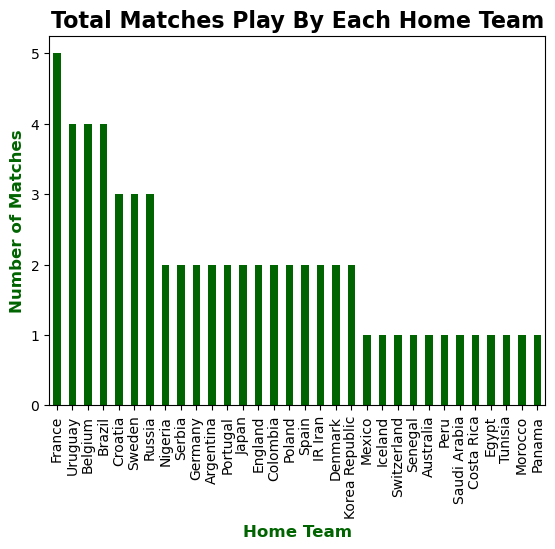

In [190]:
x.plot(kind='bar',color='darkgreen')
plt.title('Total Matches Play By Each Home Team',fontsize=16,fontweight='bold')
plt.xlabel('Home Team',color='darkgreen' ,fontsize=12,fontweight='bold')
plt.ylabel('Number of Matches',color='darkgreen' ,fontsize=12,fontweight='bold')
plt.show()

## Number of Audience by Each Home Team

In [194]:
x=data.groupby('Home Team Name')['Attendance'].sum()
x

Home Team Name
Argentina          87509
Australia          44073
Belgium           193319
Brazil            192420
Colombia           85032
Costa Rica         41432
Croatia           149998
Denmark           118738
Egypt              27015
England            77292
France            259238
Germany           122298
IR Iran            84403
Iceland            43472
Japan              74761
Korea Republic     85307
Mexico             33061
Morocco            62548
Nigeria           105372
Panama             37168
Peru               40502
Poland             87063
Portugal          121877
Russia            186766
Saudi Arabia       36823
Senegal            41970
Serbia             77357
Spain             111984
Sweden            146333
Switzerland        43319
Tunisia            41064
Uruguay           172254
Name: Attendance, dtype: int64

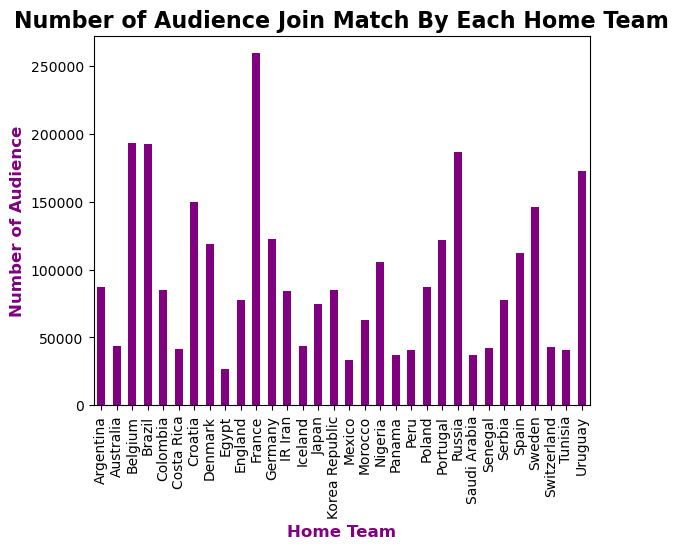

In [197]:
x.plot(kind='bar',color='purple')
plt.title('Number of Audience Join Match By Each Home Team',fontsize=16,fontweight='bold')
plt.xlabel('Home Team',color='purple' ,fontsize=12,fontweight='bold')
plt.ylabel('Number of Audience',color='purple' ,fontsize=12,fontweight='bold')
plt.show()

## Number of Matches Join by Each Referee

In [203]:
x=data['Referee'].value_counts()
x

PITANA Nestor (ARG)                5
KUIPERS Bjorn (NED)                4
FAGHANI Alireza (IRN)              4
DIEDHIOU Malang (SEN)              3
MAZIC Milorad (SRB)                3
GEIGER Mark (USA)                  3
RAMOS Cesar (MEX)                  3
SKOMINA Damir (SVN)                3
RICCI Sandro (BRA)                 3
CAKIR Cuneyt (TUR)                 3
ROCCHI Gianluca (ITA)              3
CUNHA Andres (URU)                 3
CACERES Enrique (PAR)              2
IRMATOV Ravshan (UZB)              2
MATEU Antonio (ESP)                2
TURPIN Clement (FRA)               2
SHUKRALLA Nawaf (BHR)              2
ROLDAN Wilmar (COL)                2
SIKAZWE Janny (ZAM)                2
MARCINIAK Szymon (POL)             2
GASSAMA Bakary (GAM)               1
MOHAMMED Mohammed Abdulla (UAE)    1
AGUILAR Joel (SLV)                 1
CONGER Matt (NZL)                  1
BRYCH Felix (GER)                  1
MARRUFO Jair (USA)                 1
GRISHA Ghead (EGY)                 1
K

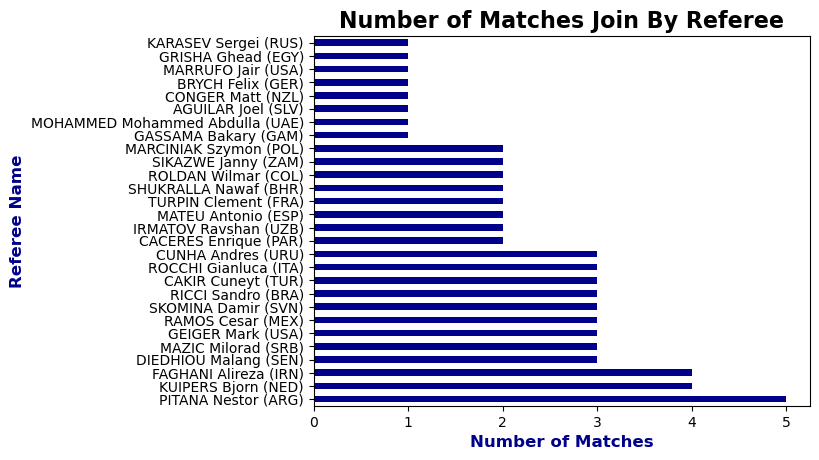

In [207]:
x.plot(kind='barh',color='darkblue')
plt.title('Number of Matches Join By Referee',fontsize=16,fontweight='bold')
plt.xlabel('Number of Matches',color='darkblue' ,fontsize=12,fontweight='bold')
plt.ylabel('Referee Name',color='darkblue' ,fontsize=12,fontweight='bold')
plt.show()